<a href="https://colab.research.google.com/github/cw805/MATH-242/blob/main/HW_2D_RandomWalks_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2D Random Walks Practice Problems

**Learning Goals:** Gain proficiency with Python coding. Explore properties of 2-dimensional random walks.

**Your task:** Complete the problem below.

**Due:** Wednesday, April 29, at 5:00pm. Do the following to submit your work.

1. Click on *Share* in the upper right corner of this window. Make sure your notebook is viewable by Prof. Wright and the course grader(s).
2. In the *Get link*, click *Copy link*.
3. Go to the [2D Random Walks](https://mdl.stolaf.edu/mod/assign/view.php?id=191525) assignment on Moodle. Paste the link to your notebook in the text field for the assignment submission. This will allow Prof. Wright or either of the course graders to view your Colab notebook.

**Grading:** The problem below will be graded on a Satisfactory/Unsatisfactory scale. You will earn a Satisfactory grade by using Python to produce an appropriate plot showing how the average distance from the origin depends on the number of steps.

**Need help?** Review the notes from class and Python documentation links on the course web site. If you still need help, email Prof. Wright. Don't forget there are also evening help sessions &mdash; the help session schedule is at the top of the course website.


In [127]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

## Problem: 2D distance from origin

What is the average distance from the origin after $n$ steps? Simulate many 2D simple symmetric random walks for $n$ steps and compute their average distance from the origin after step $n$. Do this for many values of $n$ and make a plot showing how the average distance from the origin depends on $n$. Summarize your observations.

### Generate a 2D random Walk

In [ ]:
def randomWalk2D(numSteps):
  # define the possible moves at each step
  dirs = np.array( [ [1,0], [0,1], [-1,0], [0,-1] ] )

  # set up a matrix of zeros to store the locations of the random walk
  locations = np.zeros( (numSteps+1, 2) )

  # take steps and store locations
  for i in range(1, numSteps+1):
    r = random.randrange(4)   # random integer 0, 1, 2, 3
    move = dirs[r]            # random move
    locations[i] = locations[i-1] + move  # store the next location
  
  return locations

In [189]:
randomWalk2D(4)

array([[0., 0.],
       [0., 1.],
       [1., 1.],
       [1., 0.],
       [2., 0.]])

### Find Distance from Origin after n steps


In [174]:
def distance(numStep):  
   
  locations = randomWalk2D(numStep) 
  
  # get the x and y coordinates of each position
  x = locations[:,0]
  y = locations[:,1]
 
  # calculate distance from origin for all points
  distance = np.sqrt(x ** 2 + y ** 2)    

  # return the point furthest from origin
  return max(distance)

In [178]:
distance(100)

11.180339887498949

In [185]:
def avgDist(numSteps, numWalks):
 
  total = 0
  
  for i in range(numWalks):
    total += distance(numSteps)

  return total/numWalks

In [186]:
avgDist(1000,50)

39.06817590493895

In [200]:
# get a list of average distances
avgDistList = [avgDist(n, 500) for n in range(2,100)]

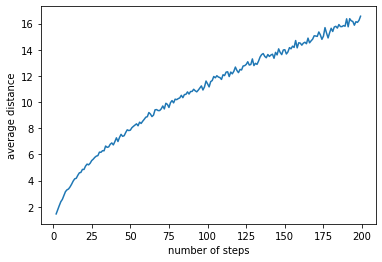

In [198]:
plt.plot(range(2,200), avgDistList)
plt.xlabel("number of steps")
plt.ylabel("average distance");

Similar to what we found in 1D random walks, the plot looks like a squared root function, we can try to square the average distances

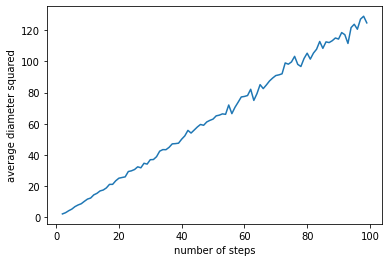

In [201]:
squaredDist = [d**2 for d in avgDistList]

plt.plot(range(2,100), squaredDist)
plt.xlabel("number of steps")
plt.ylabel("average diameter squared");

The plot is also linear! The higher the number of steps, the further the distance because it has more time to go further away from the origin. Also, the rate of increase in average distances seems slower in 2D random walks